**Question** 2

The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data as a population.  

Use this data to perform the following:

a)  Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    (5 points)

b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts. (5 points)

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.  (10 points)   


In [40]:
install.packages("boot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(dplyr)      # For data manipulation
library(ggplot2)    # For plotting
library(boot)  # For Bootstrap

In [7]:
source_file_url = "https://raw.githubusercontent.com/joelvinas/COMP-SCI_5530/refs/heads/main/Assignment_2/Data/diabetes.csv"
df <- read.csv(source_file_url)

head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [24]:
#a)
#Set a seed (to ensure work reproducibility)
#Take a random sample of 25 observations
#Find the mean Glucose and highest Glucose values of this sample
#Compare these statistics with the population statistics of the same variable.
#You should use charts for this comparison. (5 points)

rngSize = 25
rngSeed = 2148
set.seed(rngSeed)
rngSample_indices <- sample(1:nrow(df), rngSize, replace = FALSE)
rngSample <- df[rngSample_indices, ]
#head(rngSample)

glucoseMean_Sample <- mean(rngSample$Glucose)
glucoseMax_Sample <- max(rngSample$Glucose)
glucoseMean_Pop <- mean(df$Glucose)
glucoseMax_Pop <- max(df$Glucose)

compareGlucose <- data.frame(
  Source = c("Sample", "Population"),
  Mean = c(glucoseMean_Sample, glucoseMean_Pop),
  Max = c(glucoseMax_Sample, glucoseMax_Pop)
)

# Print the data frame to display its contents
head(compareGlucose)

,Source,Mean,Max
,<chr>,<dbl>,<int>
1,Sample,118.8400,189
2,Population,120.8945,199


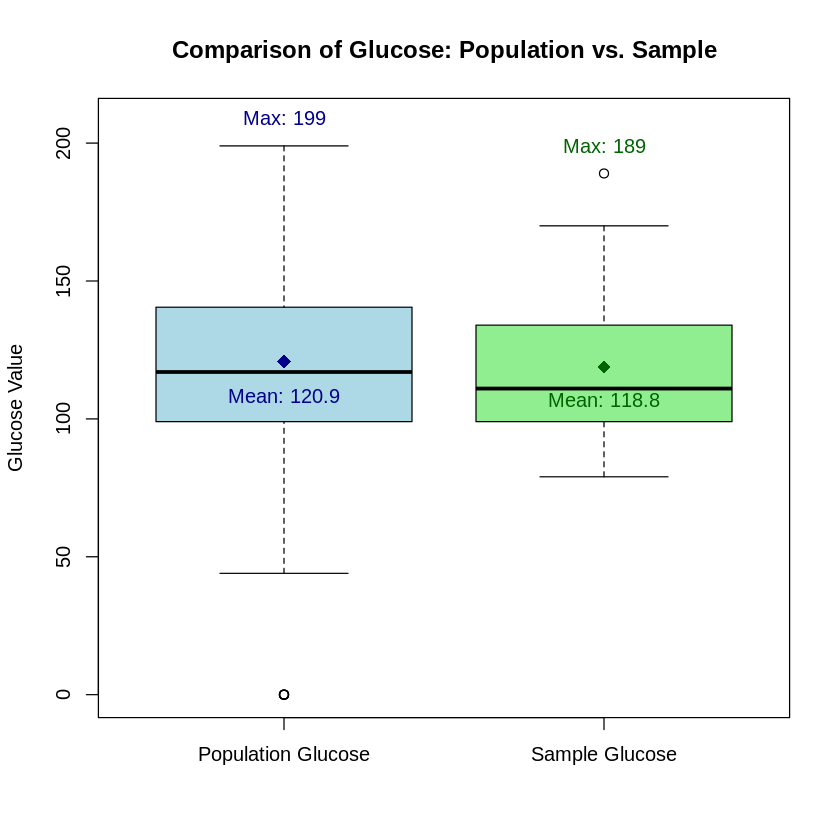

In [31]:
boxplot(df$Glucose, rngSample_df$Glucose,
        names = c("Population Glucose", "Sample Glucose"),
        main = "Comparison of Glucose: Population vs. Sample",
        ylab = "Glucose Value",
        col = c("lightblue", "lightgreen"),
        ylim = c(0, min(glucoseMax_Pop,glucoseMax_Sample) * 1.1)
        )
        #,
        #ylim = c(0, glucoseMax_Pop, glucoseMax_Sample) * 1.1)

# Add mean points
points(x = 1, y = glucoseMean_Pop, col = "darkblue", pch = 18, cex = 1.5)
points(x = 2, y = glucoseMean_Sample, col = "darkgreen", pch = 18, cex = 1.5)

# Add mean labels
text(x = 1, y = glucoseMean_Pop - 0.20 * sd(df$Glucose), labels = paste("Mean:", round(glucoseMean_Pop, 1)), col = "darkblue", pos = 1)
text(x = 2, y = glucoseMean_Sample - 0.20 * sd(rngSample_df$Glucose), labels = paste("Mean:", round(glucoseMean_Sample, 1)), col = "darkgreen", pos = 1)

# Add max labels
text(x = 1, y = glucoseMax_Pop + 0.10 * sd(df$Glucose), labels = paste("Max:", round(glucoseMax_Pop, 1)), col = "darkblue", pos = 3)
text(x = 2, y = glucoseMax_Sample + 0.10 * sd(rngSample_df$Glucose), labels = paste("Max:", round(glucoseMax_Sample, 1)), col = "darkgreen", pos = 3)

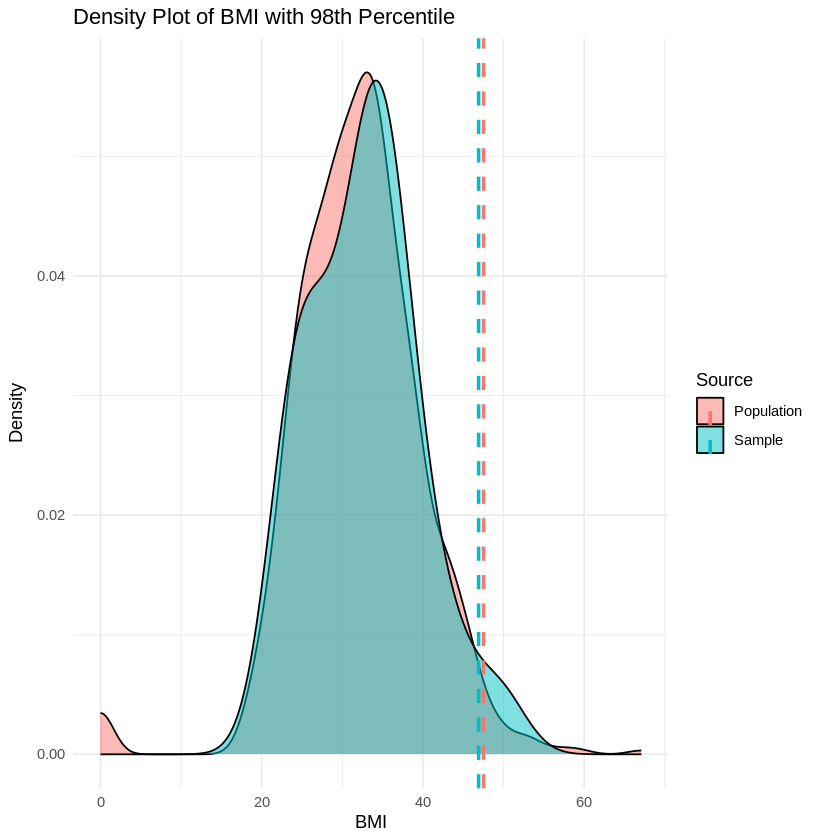

In [38]:
#b)
#Find the 98th percentile of BMI of your sample
#and the population
#and compare the results using charts. (5 points)

percentile98BMI_Sample <- quantile(rngSample_df$BMI, probs = 0.98)
percentile98BMI_Pop <- quantile(df$BMI, probs = 0.98)

# Prepare data for ggplot
population_data <- data.frame(BMI = df$BMI, Source = "Population")
sample_data <- data.frame(BMI = rngSample_df$BMI, Source = "Sample")
combined_bmi_data <- bind_rows(population_data, sample_data)

# Create a dataframe for percentile lines
percentiles_df <- data.frame(
  Source = c("Population", "Sample"),
  percentile_98 = c(percentile98BMI_Pop, percentile98BMI_Sample)
)
ggplot(combined_bmi_data, aes(x = BMI, fill = Source)) +
  geom_density(alpha = 0.5) +
  geom_vline(data = percentiles_df, aes(xintercept = percentile_98, color = Source), linetype = "dashed", linewidth = 1) +
  labs(title = "Density Plot of BMI with 98th Percentile",
       x = "BMI",
       y = "Density") +
  theme_minimal()

In [ ]:
#c)
#Using bootstrap (replace= True),
#create 500 samples (of 150 observation each) from the population and
#find the:
#   average mean,
#   standard deviation and
#   percentile for BloodPressure and
#compare this with these statistics from the population for the same variable.
#Again, you should create charts for this comparison.

In [57]:
bootstrapSamples <- 500
bootstrapObservations <- 150
bootstrap_means <- numeric(bootstrapSamples)
bootstrap_std <- numeric(bootstrapSamples)
bootstrap_95th <- numeric(bootstrapSamples
)
for (i in 1:bootstrapSamples) {
  bootstrap_sample <- sample(df$BloodPressure, size = bootstrapObservations, replace=TRUE)
  bootstrap_means[i] <- mean(bootstrap_sample)
  bootstrap_std[i] <- sd(bootstrap_sample)
  bootstrap_95th[i] <- quantile(bootstrap_sample, probs = 0.95)
}

confidence_interval <- quantile(bootstrap_means, c(0.025, 0.975))

print(confidence_interval)

    2.5%    97.5% 
66.04500 72.03333 


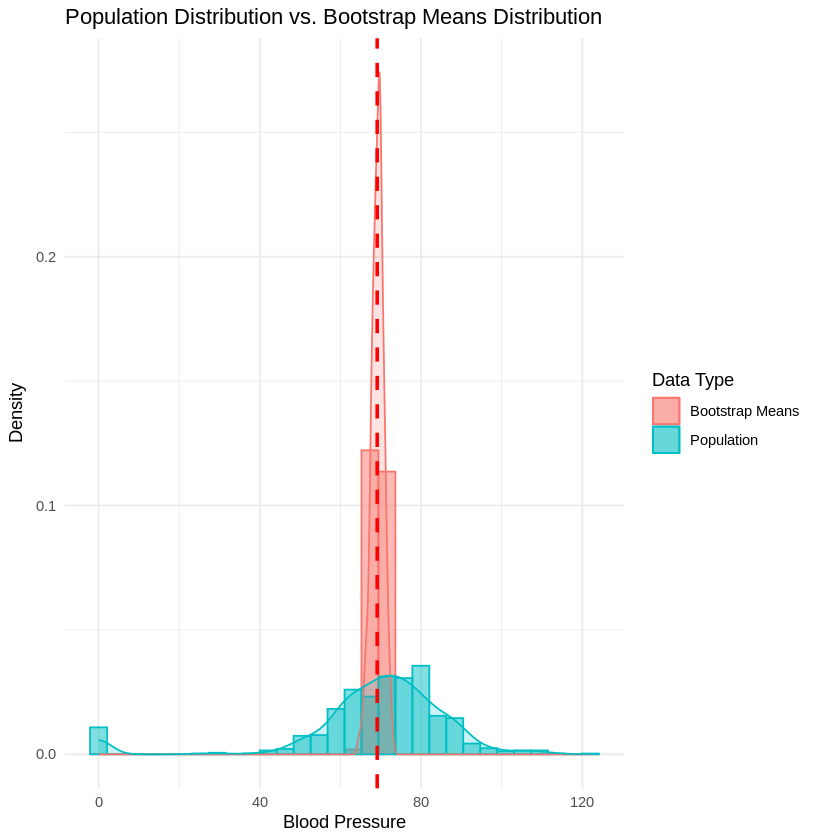

In [58]:
# --- 3. Combine Data for Plotting ---
df_BloodPressure <- data.frame(value = df$BloodPressure, type = "Population")

df_BloodPressureMean_Pop <- mean(df$BloodPressure)

# Extract the bootstrap means and put into a data frame
df_BloodPressureMean_Bootstrap <- data.frame(value = bootstrap_means, type = "Bootstrap Means")

combined_bootstrap_data <- bind_rows(df_BloodPressure, df_BloodPressureMean_Bootstrap)

# --- 4. Create the Plot ---
ggplot(combined_bootstrap_data, aes(x = value, fill = type, color = type)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, alpha = 0.5, position = "identity") +
  geom_density(alpha = 0.2) +
  geom_vline(xintercept = df_BloodPressureMean_Pop, color = "red", linetype = "dashed", size = 1) +
  labs(
    title = "Blood Pressure of Population vs. Bootstrap Means Distribution",
    x = "Blood Pressure",
    y = "Frequency",
    fill = "Data Type",
    color = "Data Type"
  ) +
  theme_minimal()

In [ ]:
#Report on your findings.  (10 points)
# The bootstrap method provides a simple method to obtain a surprisingly accurate mean that is very close to the mean of the population.
# Notably, the standard deviation for the bootstrap differs significantly from the population.
